# Embedding Workflow

In [4]:
import openai
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

In [7]:
# client = openai.AsyncOpenAI()

def openai_client():
    load_dotenv()
    return openai.AsyncOpenAI(api_key=os.getenv('OPENAI_APIKEY'))
    
def ollama_client():
    return openai.AsyncOpenAI(
        base_url='http://192.168.10.35:11434/v1',
        api_key='ollama'
    )

local = False

if local:
    client = ollama_client()
else:
    client = openai_client()
 


In [8]:
response = await client.responses.create(
    model='gpt-4o-mini',
    input='hi'
)

In [9]:
response.output_text

'Hello! How can I assist you today?'

In [10]:
phrases = [
    'hello', 'hi', 'good-bye', 'see ya later', 'moose', '1 + 1 = 2', '2 + 2 = 5', 'qperqoweirupqweor',
    '!@#$%^&*()_', 'def foobar(): return 7', 'specificity', 'agent engineering', 
    'Utah'
]

response = await client.embeddings.create(
    input=phrases,
    model='text-embedding-3-small'
)

In [11]:
embeds = np.array([emb.embedding for emb in response.data])

In [12]:
embeds

array([[ 0.01675162, -0.05579961,  0.00564744, ..., -0.01118486,
        -0.01595951, -0.01754373],
       [-0.00378579, -0.01917546,  0.01214499, ..., -0.02489924,
        -0.018951  ,  0.0030603 ],
       [ 0.05117528,  0.01717972, -0.00825848, ...,  0.01447671,
         0.0035477 , -0.01089002],
       ...,
       [-0.01580279,  0.01850753,  0.04626882, ...,  0.00840253,
        -0.00987846,  0.00018256],
       [ 0.00394506,  0.01310087,  0.00191606, ..., -0.03757348,
         0.008116  ,  0.01880232],
       [-0.0281531 , -0.01305159, -0.01177593, ..., -0.04217803,
        -0.01725465, -0.0135014 ]], shape=(13, 1536))

In [13]:
async def embed(text:str ) -> np.array:
    response = await client.embeddings.create(
        input=[text],
        model='text-embedding-3-small'
    )
    return np.array(response.data[0].embedding)

In [14]:
phrase = 'hola'
query = await embed(phrase)

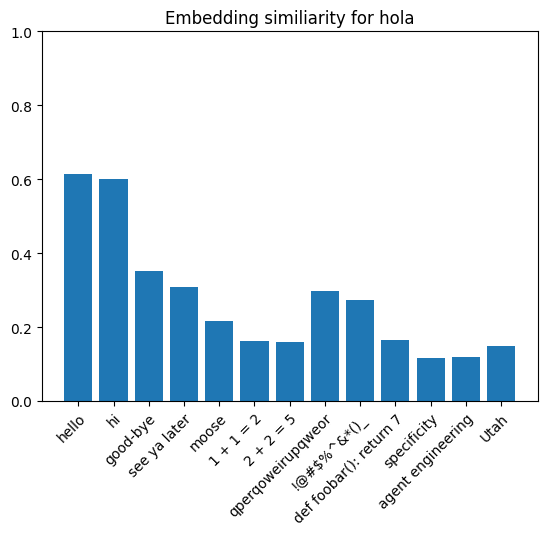

In [15]:
ax = plt.bar(x=range(len(phrases)), height=(query @ embeds.T))
plt.xticks(range(len(phrases)), phrases, rotation=45, ha='right', rotation_mode='anchor')
plt.title('Embedding similiarity for ' + phrase)
plt.ylim([0, 1]);

## Pipeline

In [17]:
async def embed(content: list[str]) -> np.array:
    response = await client.embeddings.create(
        input=content,
        model='text-embedding-3-small'
    )
    return np.array([emb.embedding for emb in response.data])

In [20]:
from pathlib import Path
import json





In [21]:
with open('book-of-mormon.json', 'r') as file:
    data = json.load(file)

#  content_dir = Path('../../../cs301R/gospel-connections/data/text/1-ne/')

In [33]:
verse_objs = []

# for i in range(0, 20):
# 	verse_objs.append(data[i])

for verse in data:
	if verse['book_title'] == '1 Nephi':
		verse_objs.append(verse)

In [34]:
print(verse_objs[0])
print(verse_objs[0]['book_title'])
print(len(verse_objs))

{'volume_title': 'Book of Mormon', 'book_title': '1 Nephi', 'book_short_title': '1 Ne.', 'chapter_number': 1, 'verse_number': 1, 'verse_title': '1 Nephi 1:1', 'verse_short_title': '1 Ne. 1:1', 'scripture_text': 'I, Nephi, having been born of goodly parents, therefore I was taught somewhat in all the learning of my father; and having seen many afflictions in the course of my days, nevertheless, having been highly favored of the Lord in all my days; yea, having had a great knowledge of the goodness and the mysteries of God, therefore I make a record of my proceedings in my days.'}
1 Nephi
618


In [36]:
# print(json.dumps(data, indent=4))

content_verses = []

for verse in verse_objs:
	# print(verse)
	content_verses.append(verse['scripture_text'])

In [ ]:
# content_verses = []
# for content_file in sorted(content_dir.glob('*.txt'), key=lambda f: f.name):
#     content_verses += content_file.read_text().splitlines()

In [37]:
content_verses

['I, Nephi, having been born of goodly parents, therefore I was taught somewhat in all the learning of my father; and having seen many afflictions in the course of my days, nevertheless, having been highly favored of the Lord in all my days; yea, having had a great knowledge of the goodness and the mysteries of God, therefore I make a record of my proceedings in my days.',
 'Yea, I make a record in the language of my father, which consists of the learning of the Jews and the language of the Egyptians.',
 'And I know that the record which I make is true; and I make it with mine own hand; and I make it according to my knowledge.',
 'For it came to pass in the commencement of the first year of the reign of Zedekiah, king of Judah, (my father, Lehi, having dwelt at Jerusalem in all his days); and in that same year there came many prophets, prophesying unto the people that they must repent, or the great city Jerusalem must be destroyed.',
 'Wherefore it came to pass that my father, Lehi, as

In [38]:
content_embeds = await embed(content_verses)

In [39]:
content_embeds

array([[ 2.28634607e-02, -3.47640575e-03,  3.43507119e-02, ...,
        -3.29934657e-02, -2.16666143e-02, -2.22465284e-02],
       [ 1.45212151e-02,  2.65756045e-02,  1.83231793e-02, ...,
        -2.30279528e-02, -1.67051202e-03, -3.13058086e-02],
       [ 2.32088510e-02,  1.96515601e-02,  1.23455273e-02, ...,
        -2.93507357e-03, -6.57110615e-03, -3.30284536e-02],
       ...,
       [ 2.94815581e-02, -4.79454594e-03,  2.58279685e-02, ...,
        -1.27369938e-02,  2.30877777e-03, -5.84068615e-03],
       [ 2.45570559e-02,  3.89245600e-02, -2.33384874e-02, ...,
        -8.42752561e-05, -3.07543483e-03,  7.37524079e-03],
       [ 4.97348644e-02,  2.95491908e-02,  9.51055717e-03, ...,
         1.95857491e-02, -2.07620710e-02, -1.97151452e-02]],
      shape=(618, 1536))

In [40]:
async def get_verses(phrase, threshold = 0.6):
    embedding = await embed([phrase])
    scores = content_embeds @ embedding.T
    return np.array(content_verses)[scores.flatten() > threshold]

In [43]:
hits = await get_verses('old bible', threshold=0.32)

In [44]:
for hit in hits:
    print(hit)
    print()

And it came to pass that the Jews did mock him because of the things which he testified of them; for he truly testified of their wickedness and their abominations; and he testified that the things which he saw and heard, and also the things which he read in the book, manifested plainly of the coming of a Messiah, and also the redemption of the world.

And when the Jews heard these things they were angry with him; yea, even as with the prophets of old, whom they had cast out, and stoned, and slain; and they also sought his life, that they might take it away. But behold, I, Nephi, will show unto you that the tender mercies of the Lord are over all those whom he hath chosen, because of their faith, to make them mighty even unto the power of deliverance.

Wherefore, let us be faithful in keeping the commandments of the Lord; therefore let us go down to the land of our father's inheritance, for behold he left gold and silver, and all manner of riches. And all this he hath done because of th